<a href="https://colab.research.google.com/github/aloksingh43/HEALTH_INSURANCE_CROSS_SELL_PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
# Let's import some important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

♦ We will import some necessary libraries as per the requirement of our project.

### Dataset Loading

In [ ]:
# Give the path of the folder to access all the csv data files
url='https://drive.google.com/file/d/1BDojWtEMWK615Ye_UHPrFTVTIywl_eas/view?usp=sharing' 
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [ ]:
# Let's read the csv file
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION=pd.read_csv(url)

### Dataset First View

In [ ]:
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
print('the shape of data is - ',df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.shape)

the shape of data is -  (381109, 12)


In [ ]:
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [ ]:
df=df_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.copy()

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# let's check null values 
null_values_in_data=df.isnull().sum().sort_values(ascending=False)
print(null_values_in_data)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [ ]:
# let's check duplicate values in our dataset
len(df[df.duplicated()])

0

Let's Drop ID column. Because it not useful for us.

In [ ]:
df.drop("id",inplace=True,axis=1)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
### Check Unique Values 
for col in df.columns:
    print(f"{col}: ")
    print("")
    print(df[col].unique())
    print("")


Gender: 

['Male' 'Female']

Age: 

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage: 

['Yes' 'No']

Annual_Premium: 

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel: 

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54

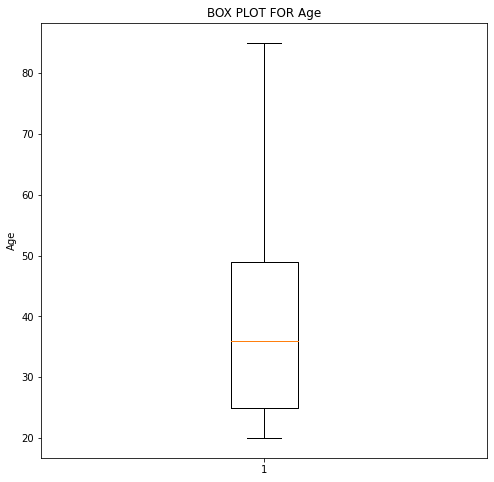

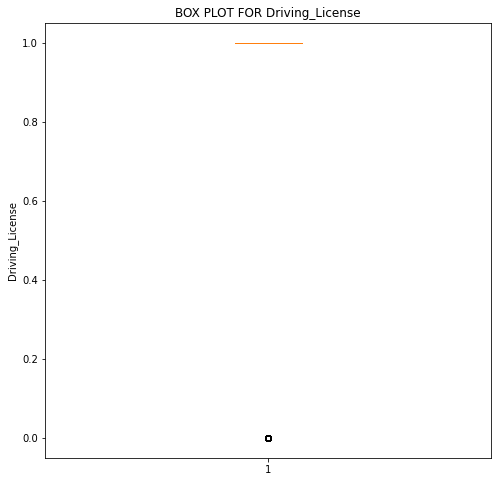

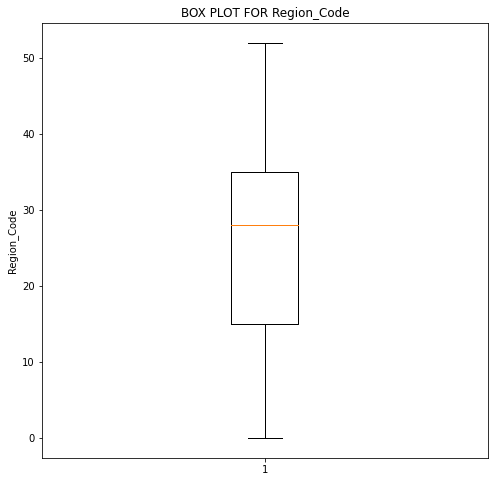

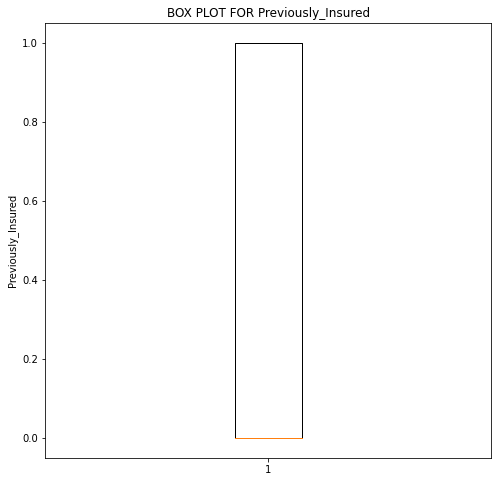

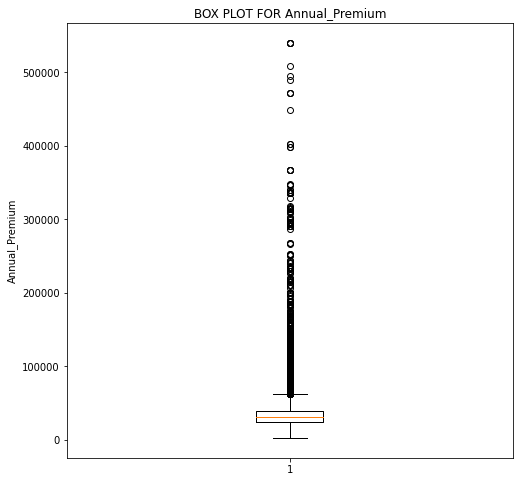

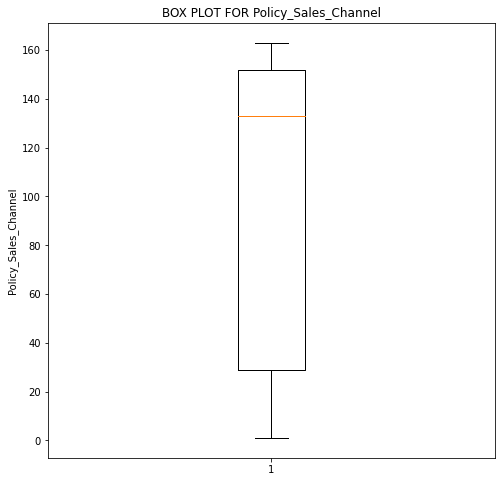

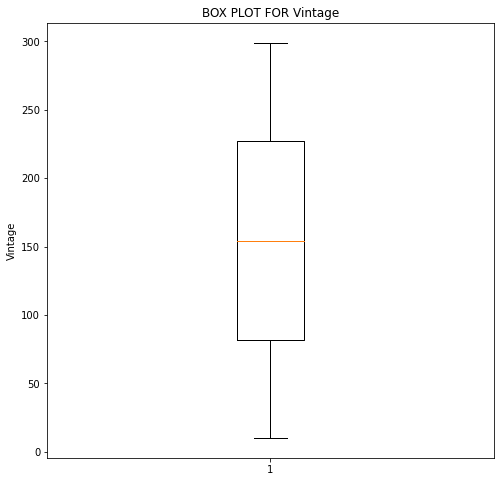

In [ ]:
# Box plot for numeric features
for col in df.describe():
  if col=='Response':
    pass
  else:
         plt.figure(figsize=(8,8))
         plt.boxplot(df[col])
         plt.ylabel(col)
         plt.title(f'BOX PLOT FOR {col}');
         

In [ ]:
q1=df['Annual_Premium'].quantile(0.25)
q3=df['Annual_Premium'].quantile(0.75)
print(q1)
print(q3)

24405.0
39400.0


In [ ]:
IQR=q3-q1
Lower_Whisker = q1-1.5*IQR
Upper_Whisker = q3+1.5*IQR
print(Lower_Whisker)
print(Upper_Whisker)


1912.5
61892.5


In [ ]:
df=df[df['Annual_Premium']>Lower_Whisker]
df=df[df['Annual_Premium']<Upper_Whisker]

In [ ]:

pd.crosstab(index = df['Previously_Insured'], columns = df['Response'])

Response,0,1
Previously_Insured,,
0,155349,45001
1,170285,154


In [ ]:
df = df.drop(df[(df['Previously_Insured']==1) & (df['Response']==1)].index)


In [ ]:
df.shape

(370635, 11)

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
def count(col):
  count = df[col].value_counts()

# Calculate the percentage of each unique value in the 'Gender' column
  percent = count / len(df) * 100
  count_df = pd.concat([count,  percent], axis=1, keys=['Count', 'Percentage'])

 
  print(count_df)
  plt.figure(figsize = (10, 5))
  percent.plot.pie(labels=percent.index, autopct='%.2f%%')


  plt.show()

         Count  Percentage
Male    200226   54.022421
Female  170409   45.977579


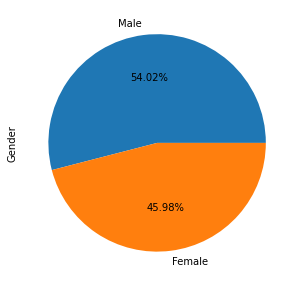

In [ ]:
count('Gender')

    Count  Percentage
1  369872   99.794137
0     763    0.205863


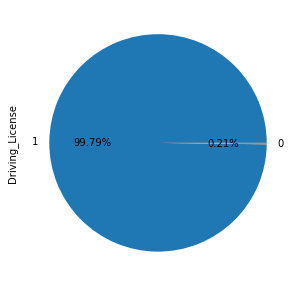

In [ ]:
count('Driving_License')

In [ ]:
df['Age'].mean()

38.67153129089266

    Count  Percentage
0  200350   54.055877
1  170285   45.944123


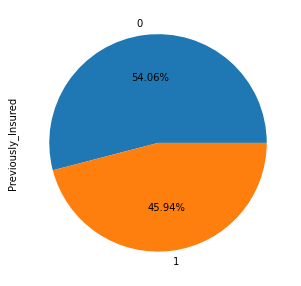

In [ ]:
count('Previously_Insured')

            Count  Percentage
1-2 Year   194119   52.374708
< 1 Year   161487   43.570359
> 2 Years   15029    4.054933


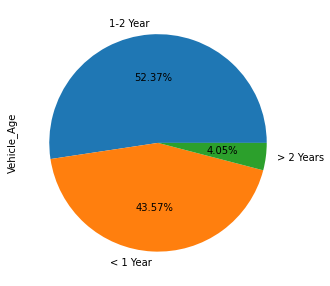

In [ ]:
count('Vehicle_Age')

      Count  Percentage
Yes  186476   50.312572
No   184159   49.687428


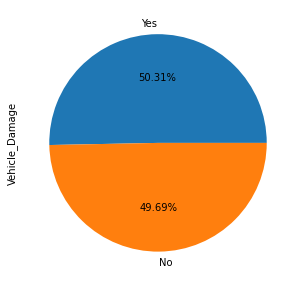

In [ ]:
count('Vehicle_Damage')

    Count  Percentage
0  325634   87.858405
1   45001   12.141595


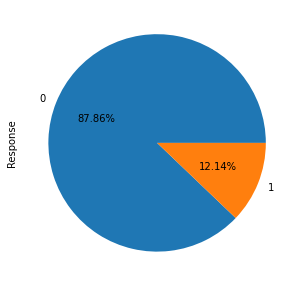

In [ ]:
count('Response')

In [ ]:
pd.crosstab(index = df['Gender'], columns = df['Response'])

Response,0,1
Gender,,
Female,152871,17538
Male,172763,27463


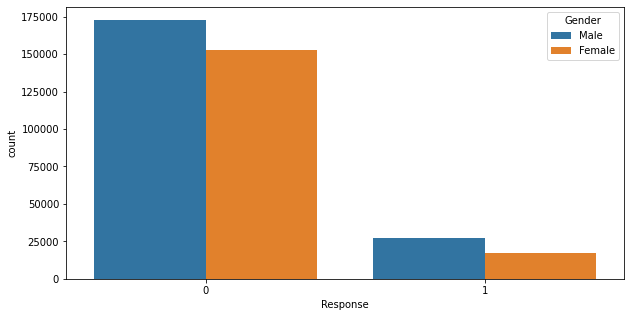

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(df['Response'], hue = df['Gender']);

In [ ]:
pd.crosstab(index = df['Previously_Insured'], columns = df['Response'])

Response,0,1
Previously_Insured,,
0,155349,45001
1,170285,0


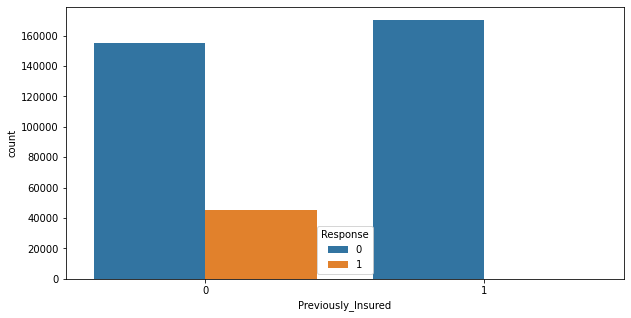

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(df['Previously_Insured'], hue = df['Response']);

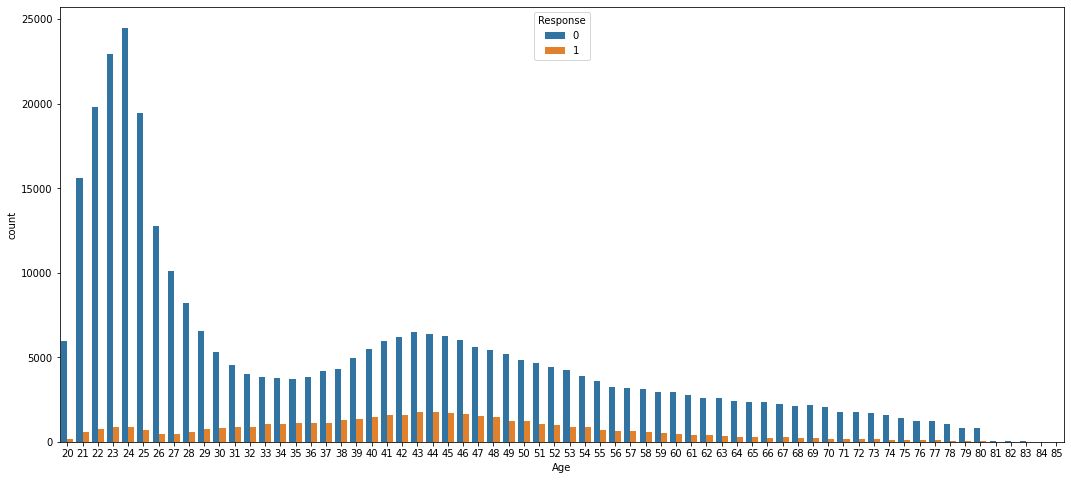

In [ ]:
plt.figure(figsize = (18, 8))
sns.countplot(df['Age'], hue = df['Response']);

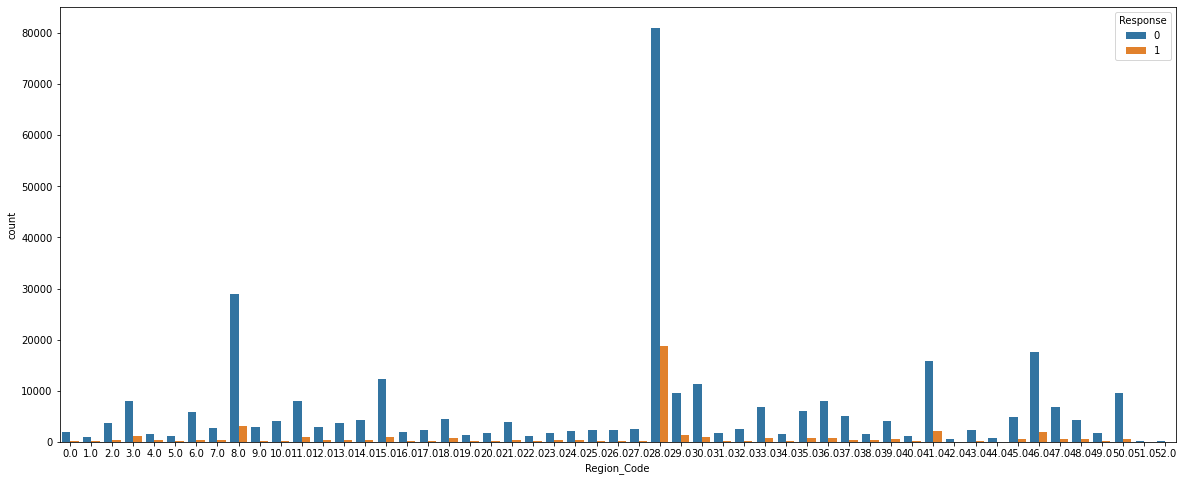

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(df['Region_Code'], hue = df['Response']);

In [ ]:
df['time']=df['Vintage'].apply(lambda x:'New_customer' if x >= 1 and x<=60 else 'medium_customer' if x>60 and x<=180 else 'Old_customer')

In [ ]:
pd.crosstab(index = df['time'], columns = df['Response'])

Response,0,1
time,,
New_customer,57063,8080
Old_customer,133477,18436
medium_customer,135094,18485


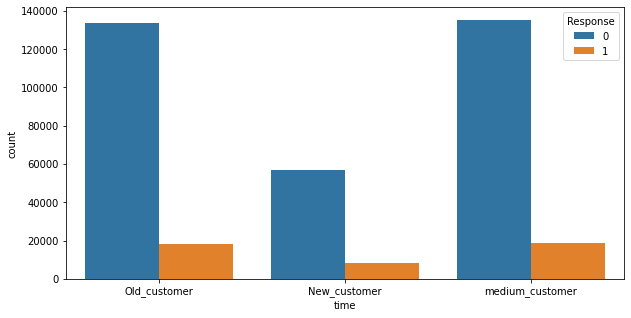

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(df['time'], hue = df['Response']);

In [ ]:
df['Age_Group'] = df['Age'].apply(lambda x:'Young_Age' if x >= 20 and x<=40 else 'Middle_Age' if x>40 and x<=60 else 'Old_Age')

In [ ]:
pd.crosstab(index = df['Age_Group'], columns = df['Response'])

Response,0,1
Age_Group,,
Middle_Age,94630,22809
Old_Age,37179,3907
Young_Age,193825,18285


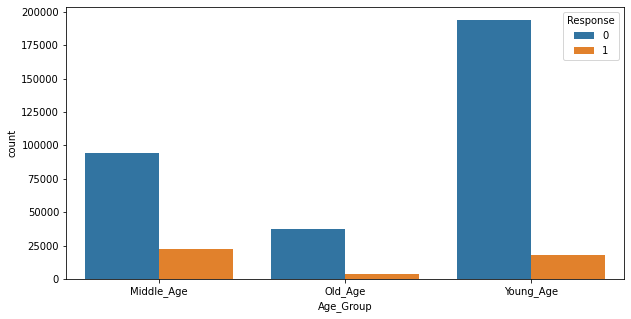

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(df['Age_Group'], hue = df['Response']);

In [ ]:
pd.crosstab(index = df['Vehicle_Age'], columns = df['Response'])

Response,0,1
Vehicle_Age,,
1-2 Year,160467,33652
< 1 Year,154487,7000
> 2 Years,10680,4349


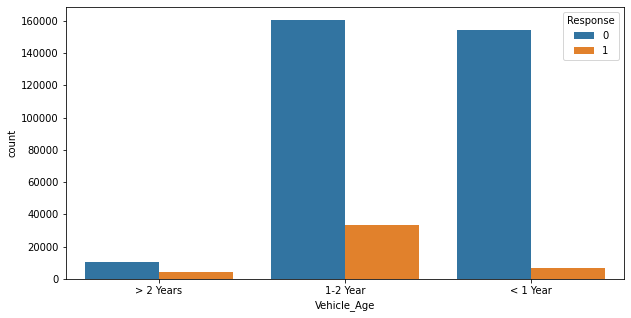

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(df['Vehicle_Age'], hue = df['Response']);

In [ ]:
min_annual_premium=df['Annual_Premium'].min()
df['policy_type'] = df['Annual_Premium'].apply(lambda x:'low_Premium_policy' if x >=min_annual_premium and x<=15000 else 'average_Premium_policy' if x>15000 and x<=30000 else 'high_Premium_policy')

In [ ]:
pd.crosstab(index = df['policy_type'], columns = df['Response'])

Response,0,1
policy_type,,
average_Premium_policy,90803,9963
high_Premium_policy,178094,26544
low_Premium_policy,56737,8494


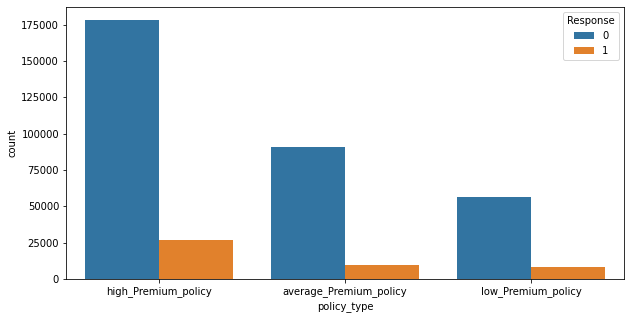

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(df['policy_type'], hue = df['Response']);